LinearRegression 是你和一个带有回归系数的w=(w1,...,wp),使得数据的实际观测值和线性近似预测的预测值之间的残差平方和最小的一个线性模型。数学上讲，它解决了这个形式的问题：
LinearRegression 将采用它的 fit 方法去拟合数组X, y,并将线性模型的回归系数w存储在它的 coef_ 中：

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0,0],[2,1],[4,2]],[0,1,2])

LinearRegression()

In [4]:
reg.coef_

array([0.4, 0.2])

普通最小二乘的系数估计依赖于特征的独立性。当特征相关且设计矩阵X的列之间具有近似线性相关性时，设计矩阵趋于奇异矩阵，最小二乘估计对观测目标的随机误差高度敏感，可能产生很大的方差。例如，在没有实验设计的情况下收集数据时，就可能会出现这种多重共线性的情况。

### 线性回归实例

此示例仅使用 diabetes 数据集的第一个特征，以说明此回归技术的二维绘图。在途中可以看到直线，显示线性回归如何试图绘制一条直线，使数据集中观察到的响应与线性近似预测的响应之间的残差平方和最小化。
计算了系数、残差平方和及确定系数。

In [54]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

Automatically created module for IPython interactive environment


In [55]:
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [56]:
# 只用一个特征
diabetes_X = diabetes_X[:, np.newaxis, 2]
# 另一种写法
# diabetes_X[:, 2].reshape(-1, 1)

In [57]:
# 拆分训练集 和 验证集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [65]:
# 创建线性回归模型
regr = linear_model.LinearRegression()

In [66]:
# 训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [67]:
# 模型预测
diabetes_y_predict = regr.predict(diabetes_X_test)

In [73]:
# 回归系数
print('Coefficients: \n', regr.coef_)
# 均方误差
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_predict))
# R2
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_predict))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


In [80]:
diabetes_y_predict

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

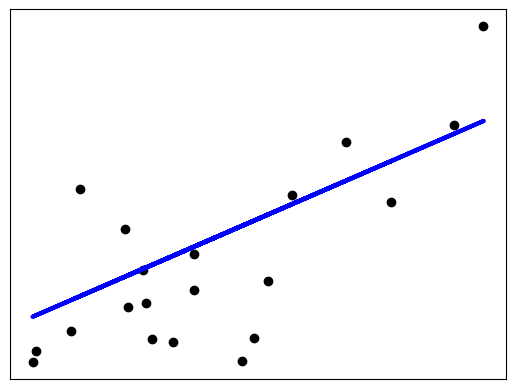

In [81]:
# 画图
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()